In [ ]:
#Importing required libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Creating a function and its derivatives

In [ ]:
def func(x, y):
  return x**2+y**2 - 1

def derx(x, y):
  return 2*x

def dery(x, y):
  return 2*y

x = np.linspace(-3, 3, 2000)
y = np.linspace(-3, 3, 2000)

X, Y = np.meshgrid(x, y)

xlist = []
ylist = []
zlist = []

Stochastic gradient descent algorithm 

In [ ]:
def SGD(x10, x20, batch_size, alpha, nb_max_iter, e):

  numofobs = x.shape[0]
  xy = np.c_[x.reshape(numofobs, -1), y.reshape(numofobs, 1)]

  delta_arr = []

  z = func(X, Y)
  z0 = func(x10, x20)

  cond = e + 1
  num_iter = 0 
  tmp_z0 = z0

  random_state = None
  seed = None if random_state is None else int(random_state)
  rng = np.random.default_rng(seed=seed)
  rng.shuffle(xy)
  xb = []
  yb = []
  for it, start in zip(range(nb_max_iter), range(0, numofobs, batch_size)):
      stop = start + batch_size
      xbatch, ybatch = xy[start:stop, :-1], xy[start:stop, -1:] 
      tmpx10 = xbatch - alpha*derx(xbatch, ybatch)
      tmpx20 = ybatch - alpha*dery(xbatch, ybatch)
      xbatch = tmpx10
      ybatch = tmpx20
      z0 = func(xbatch,ybatch)

      xlist.append(xbatch)
      ylist.append(ybatch)

      zlist.append(func(xbatch, ybatch))

      num_iter = num_iter + 1
      cond = abs(tmp_z0 - z0)

      delta_arr.append(np.mean(cond))

      tmp_z0 = z0
      for i in range(len(xbatch)):
        xb.append(float(xbatch[i]))
        yb.append(float(ybatch[i]))
      if min(cond) < e:
        print ("Local minimum occurs at : {}".format(min(cond)))
        print ("Number of steps done:", num_iter)
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.hist(xb)
        ax1.set_title('xbatch')
        ax2.hist(yb)
        ax2.set_title('ybatch')
        return delta_arr
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.hist(xb)
  ax1.set_title('xbatch')
  ax2.hist(yb)
  ax2.set_title('ybatch')

Local minimum occurs at : [0.]
Number of steps done: 68


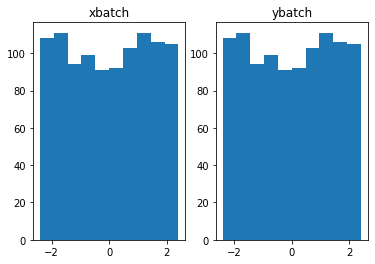

In [ ]:
delta_arr = SGD(-3.0, -2.0, 15, 0.1, 100, 0.001)

As we can see, xbatch and ybatch fluctuate near zero almost uniformly

Ploting the curve

<Figure size 720x720 with 0 Axes>

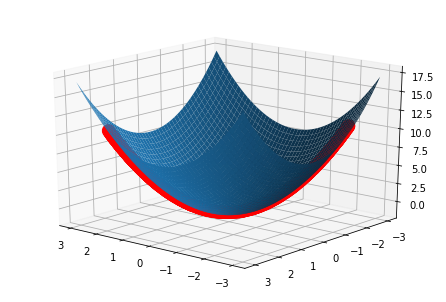

In [ ]:
plt.figure(figsize=(10, 10))
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, func(X, Y))
sc = ax.scatter(xlist,ylist, zlist, c="r", s = 150)
ax.view_init(20, 130)
plt.show()

As we can see, the algorithm during its work descend to the point of the minimum

Plotting the steps taken by the SGD optimizer

Plot every 50 element of x and z

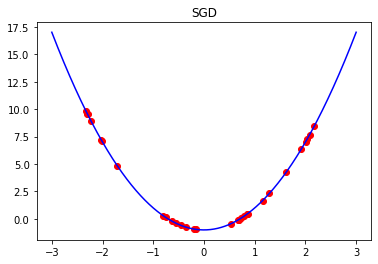

In [ ]:
plt.scatter(xlist[::50], zlist[::50], c="r")
plt.plot(x, func(x, y), c="b")
plt.title("SGD")
plt.show()

Plotting the dependence of x - x_prev of the number of iterations


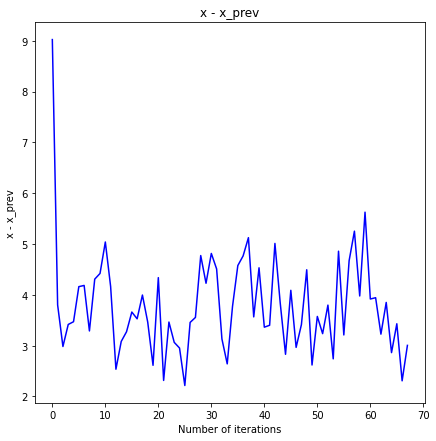

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(range(len(xlist)), delta_arr, c="b")
plt.xlabel('Number of iterations')
plt.ylabel('x - x_prev')
plt.title("x - x_prev")
plt.show()

Adam's optimization algorithm 

In [ ]:
def Adam(xnew, xprev, ynew, yprev, precision, l_r, beta1, beta2, e):
        
    xlist, ylist, zlist = [xnew], [ynew], [func(xnew, ynew)]
    
    #Grad. Descent with Momentum, RMS prop
    vd_x = 0
    sd_x = 0
    
    vd_y = 0
    sd_y = 0

    delta_arr = []

    t = 1

    #Cycle executes until we get required presicion
    while (abs(xnew - xprev) > precision) and (abs(ynew - yprev) > precision): 
        xprev = xnew
        yprev = ynew
        
        d_x = -derx(xprev, yprev)
        d_y = -dery(xprev, yprev)
        
        vd_x = beta1*vd_x + ((1 - beta1)*d_x)
        vd_y = beta1*vd_y + ((1 - beta1)*d_y)
           
        sd_x = beta2 * sd_x + ((1 - beta2)*(d_x*d_x))
        sd_y = beta2 * sd_y + ((1 - beta2)*(d_y*d_y))

        vd_x = vd_x/(1 - (beta1)**t)
        sd_x = sd_x/(1 - (beta2)**t)
        
        vd_y = vd_y/(1 - (beta1)**t)
        sd_y = sd_y/(1 - (beta2)**t)

        nd_x = vd_x/np.sqrt(sd_x + e)
        nd_y = vd_y/np.sqrt(sd_y + e)

        xnew = xprev + (l_r * nd_x)
        ynew = yprev + (l_r * nd_y)

        delta_x = xnew - xprev
        delta_arr.append(delta_x)

        xlist.append(xnew)
        ylist.append(ynew)
        zlist.append(func(xnew, ynew))
        
        t = t + 1
    return xnew, ynew, zlist, ylist, xlist, delta_arr

In [ ]:
xnew, ynew, zlist, ylist, xlist, delta_arr = Adam(-2, -1.0, -2, -1.0, 0.01, 0.8, 0.8, 0.9, 10**-8)

Print the local minimum and number of steps

In [ ]:
print ("Local minimum occurs at : {} and {} ".format(str(xnew), str(ynew)))
print ("Number of steps done: ", len(xlist))

Local minimum occurs at : 3.1969487119840267 and 3.1969487119840267 
Number of steps done:  17


Print the dependence of x - x_prev of the number of iterations

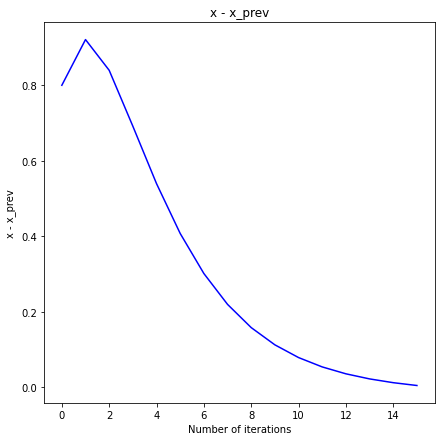

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(range(len(xlist)-1), delta_arr, c="b")
plt.xlabel('Number of iterations')
plt.ylabel('x - x_prev')
plt.title("x - x_prev")
plt.show()

Plotting the curve

<Figure size 720x720 with 0 Axes>

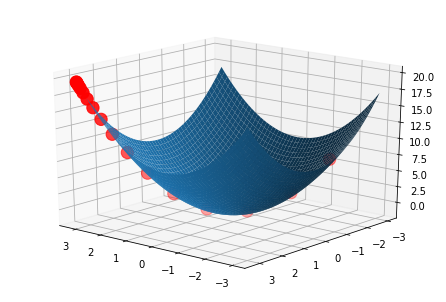

In [ ]:
plt.figure(figsize=(10, 10))
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, func(X, Y))
sc = ax.scatter(xlist,ylist, zlist, c="r", s=150)
ax.view_init(20, 130)
plt.show()

Plotting the steps taken by the Adam optimizer

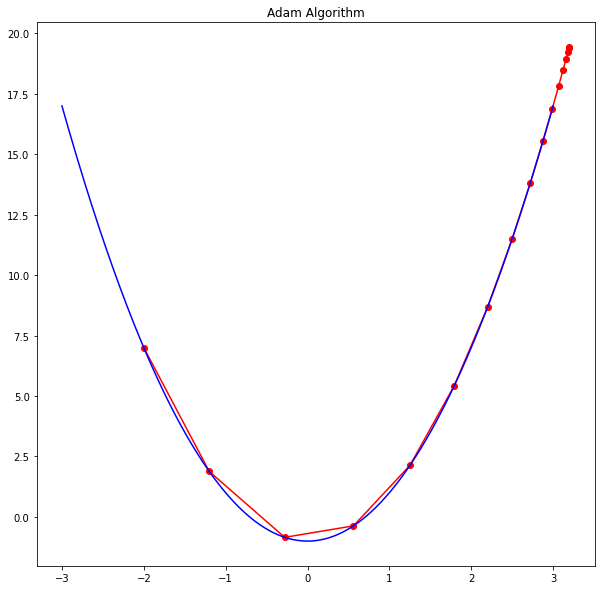

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(xlist, zlist, c="r")
plt.plot(xlist, zlist, c="r")
plt.plot(x, func(x, y), c="b")
plt.title("Adam Algorithm")
plt.show()